### <b>대량의 데이터를 파일입출력하기</b>

* 현업에서는 <b>대량의 데이터</b>를 불러오거나 저장해야 하는 경우가 많다.
* <b>엑셀 파일 형태(.csv)</b>의 데이터를 NumPy 및 Pandas로 처리하는 방법을 알아보자.

In [ ]:
import random
import pandas as pd
import os
import numpy as np
import time
import pandas as pd
from IPython.display import display, Image

#### <b>학생 정보 데이터 세트 만들기</b>

* 학교에서는 학생 정보 관리 프로그램이 사용될 수 있다.
* <b>가상의 학생 정보</b>를 생성하여, 파일 형태로 저장해 보자.

#### <b>1. 랜덤 데이터 생성 함수</b>

* 랜덤 데이터 생성 함수를 작성한다.
* 파이썬(python)의 random 라이브러리를 사용할 수 있다.

In [ ]:
last_names = [
    "Smith", "Johnson", "Williams", "Jones", "Brown",
    "Davis", "Miller", "Wilson", "Moore", "Taylor",
    "Anderson", "Thomas", "Jackson", "White", "Harris",
    "Martin", "Thompson", "Garcia", "Martinez", "Robinson",
    "Clark", "Rodriguez", "Lewis", "Lee", "Walker",
    "Hall", "Allen", "Young", "Hernandez", "King"
]

first_names = [
    "James", "Mary", "Robert", "Patricia"	, "John",
    "Jennifer", "Michael", "Linda", "David", "Elizabeth",
    "William", "Barbara", "Richard", "Susan", "Joseph",
    "Jessica", "Thomas", "Sarah", "Charles", "Karen",
    "Christopher", "Lisa", "Daniel", "Nancy", "Matthew",
    "Betty", "Anthony", "Margaret", "Mark", "Sandra"
]

departments = [
    "Computer Science",
    "Mechanical Engineering",
    "Biomedical Engineering",
    "Radiology",
    "Psychology"
]

mu = 50
sigma = 10

grades = [1, 2, 3]

def generate_name():
    # 랜덤으로 하나의 성(last name) 추출
    last_name = random.choice(last_names)
    # 랜덤으로 하나의 이름(first name) 추출
    first_name = random.choice(first_names)
    return first_name + " " + last_name

def genearte_department():
    # 랜덤으로 하나의 학과(department) 추출
    return random.choice(departments)

def generate_score():
    # 랜덤으로 하나의 성적(score) 추출
    return np.random.normal(mu, sigma, 1)[0]

def generate_grades():
    # 랜덤으로 하나의 학년(grade) 추출
    return random.choice(grades)

#### <b>2. 랜덤 학생 정보 생성하기</b>

* 실질적으로 학생 정보를 ① 1,000, ② 10,000, ③ 100,000건 포함한 데이터 세트를 각각 생성해 보자.
* 테이블(table) 형태의 데이터에 해당하므로, <b>판다스(Pandas)</b>의 <b>데이터프레임(dataframe)</b> 형태로 저장할 수 있다.

In [ ]:
# 학생 정보 생성 함수
def generate_student():
    name = generate_name()
    department = genearte_department()
    score = generate_score()
    grade = generate_grades()

    return name, department, score, grade

def generate_dataset(cnt, path):
    students = []

    # 다수의 학생 데이터 생성 (학번, 이름, 학과, 성적, 학년)
    for id in range(1, cnt + 1):
        name, department, score, grade = generate_student()
        students.append((id, name, department, score, grade))

    df = pd.DataFrame(students, columns=["id", "name", "department", "score", "grade"])
    df.to_csv(path) # 학생 데이터를 엑셀 파일(.csv) 형태로 저장
    df.head()

generate_dataset(1000, "students_1000.csv")
generate_dataset(10000, "students_10000.csv")
generate_dataset(100000, "students_100000.csv")

In [ ]:
result_path = ["students_1000.csv", "students_10000.csv", "students_100000.csv"]

for path in result_path:
    print(f"[File: {path}]")
    n = os.path.getsize(path)
    print(f"Total size: {n:.2f} bytes.")
    print(f"Total size: {n / 1024:.2f} KB.")
    print(f"Total size: {n / 1024 / 1024:.2f} MB.")

[File: students_1000.csv]
Total size: 58802.00 bytes.
Total size: 57.42 KB.
Total size: 0.06 MB.
[File: students_10000.csv]
Total size: 611650.00 bytes.
Total size: 597.31 KB.
Total size: 0.58 MB.
[File: students_100000.csv]
Total size: 6325728.00 bytes.
Total size: 6177.47 KB.
Total size: 6.03 MB.


#### <b>3. 파일 입력을 통해 데이터 불러오기</b>

* 파이썬의 기본적인 <b>파일 입력 함수</b>를 이용해 데이터를 불러올 수 있다.
* <b>엑셀 파일(.csv)</b>의 경우 <b>판다스(Pandas) 라이브러리</b>를 이용해 <b>데이터프레임(dataframe)</b> 형태로 불러올 수 있다.
* 경우에 따라서 기본적인 파일 입력 함수를 이용해 직접 구현한 것의 속도가 더 빠를 수 있다.

In [ ]:
def file_reader(path):
    start_time = time.time()

    students = []
    with open(path, "r") as f:
        rows = f.readlines()
        # 첫째 줄은 속성(property)에 대한 내용이므로, 둘째 줄부터 읽기
        for row in rows[1:]:
            data = row.strip().split(",")
            index = data[0]
            id = data[1]
            name = data[2]
            department = data[3]
            score = data[4]
            grade = data[5]
            student = (id, name, department, score, grade)
            students.append(student)

    print(f"Data inserted ({time.time() - start_time:.4f} seconds.)")
    return students

students = file_reader("students_100000.csv")
print(students[0])
print(students[99999])

Data inserted (0.1992 seconds.)
('1', 'Jessica Thomas', 'Mechanical Engineering', '36.4482202816166', '1')
('100000', 'James Miller', 'Computer Science', '50.75770607416239', '3')


In [ ]:
def csv_reader(path):
    start_time = time.time()

    students = []
    df = pd.read_csv(path)
    for index, row in df.iterrows():
        id = row["id"]
        name = row["name"]
        department = row["department"]
        score = row["score"]
        grade = row["grade"]
        student = (id, name, department, score, grade)
        students.append(student)

    print(f"Data inserted ({time.time() - start_time:.4f} seconds.)")
    return students

students = csv_reader("students_100000.csv")
print(students[0])
print(students[99999])

Data inserted (19.8460 seconds.)
(1, 'Jessica Thomas', 'Mechanical Engineering', 36.4482202816166, 1)
(100000, 'James Miller', 'Computer Science', 50.75770607416239, 3)


#### <b>Image Captcha 라이브러리(Library)</b>

* 특정 자릿수의 정수를 이미지 형태로 반환하는 <b>이미지 캡차(image captcha)</b> 라이브러리를 사용해 보자.
* <b>Reference</b>: https://pypi.org/project/captcha/

In [ ]:
!pip install captcha

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 102 kB 9.2 MB/s 


#### <b>1. 랜덤 캡차 이미지 생성하기</b>

* <b>(이미지, 정답 레이블)</b>을 생성한 뒤에, 메타 데이터를 저장하여 관리할 수 있다.
* <b>메타 데이터</b>는 테이블(table) 형태의 데이터에 해당하므로, <b>판다스(Pandas)</b>의 <b>데이터프레임(dataframe)</b> 형태로 저장할 수 있다.

In [ ]:
from captcha.image import ImageCaptcha

def generate_random_images(directory, n_digits, cnt):
    # 메타 데이터 (경로, 정답)
    metadata = []

    # 디렉토리(directory)가 존재하지 않을 때
    if not os.path.exists(directory):
        os.makedirs(directory)

    # 이미지 캡차(image captcha) 객체 생성
    image = ImageCaptcha()

    # 개수(cnt)만큼 이미지 캡차 생성
    for i in range(cnt):
        # 특정한 자릿수(n_digits)의 랜덤 정수 생성
        number = random.randint(0, (10 ** n_digits) - 1)
        # 문자열 형태로 변환
        string = str(number).zfill(n_digits)
        # 이미지 캡차 생성
        cur = 0
        path = os.path.join(directory, f"{string}_{cur}.png")
        while os.path.exists(path):
            cur += 1
            path = os.path.join(directory, f"{string}_{cur}.png")
        image.write(string, path)
        metadata.append((f"{string}_{cur}.png", string))
        
        if (i + 1) % 1000 == 0:
            print(f"[Log] {i + 1} images have been generated.")
    
    # 데이터를 엑셀 파일(.csv) 형태로 저장
    df = pd.DataFrame(metadata, columns=["image_path", "target"])
    df.to_csv(os.path.join(directory, "metadata.csv"))

* 실질적으로 <b>학습용/테스트용 데이터 세트를 구축</b>할 수 있다.
* 만들어진 데이터 세트의 구성을 확인하면 다음과 같은 형태를 보인다.

<pre>
train/
  0001_0.png
  0002_0.png
  0003_0.png
  ...
test/
  0009_0.png
  0018_0.png
  0024_0.png
  ...
</pre>

In [ ]:
# 학습 데이터 세트 생성
directory = "./train"
n_digits = 4
cnt = 10000

generate_random_images(directory, n_digits, cnt)

# 테스트 데이터 세트 생성
directory = "./test"
n_digits = 4
cnt = 1000

generate_random_images(directory, n_digits, cnt)

[Log] 1000 images have been generated.
[Log] 2000 images have been generated.
[Log] 3000 images have been generated.
[Log] 4000 images have been generated.
[Log] 5000 images have been generated.
[Log] 6000 images have been generated.
[Log] 7000 images have been generated.
[Log] 8000 images have been generated.
[Log] 9000 images have been generated.
[Log] 10000 images have been generated.
[Log] 1000 images have been generated.


#### <b>2. 만들어진 데이터 세트 불러오기</b>

* <b>메타 데이터</b>를 먼저 불러온 뒤에, 실제 이미지 데이터에 접근할 수 있다.

In [ ]:
train_directory = "./train"
print(f"학습 데이터 개수: {len(os.listdir(train_directory))}")

test_directory = "./test"
print(f"테스트 데이터 개수: {len(os.listdir(test_directory))}")

학습 데이터 개수: 10001
테스트 데이터 개수: 1001


In [ ]:
def csv_reader(path):
    start_time = time.time()
    dtype_dict = {
        "image_path": str, 
        "target" : str
    }
    data_list = []
    # 정답 레이블은 문자열(string) 형태
    df = pd.read_csv(path, dtype=dtype_dict)
    for index, row in df.iterrows():
        image_path = row["image_path"]
        target = row["target"]
        data = (image_path, target)
        data_list.append(data)

    print(f"Data inserted ({time.time() - start_time:.4f} seconds.)")
    return data_list

data_list = csv_reader("./train/metadata.csv")
print(f"전체 데이터 개수: {len(data_list)}")
print(data_list[0])

Data inserted (0.5496 seconds.)
전체 데이터 개수: 10000
('4687_0.png', '4687')


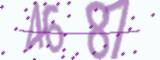

In [ ]:
image_path, target = data_list[0]
image = Image(os.path.join("./train", image_path))
display(image)